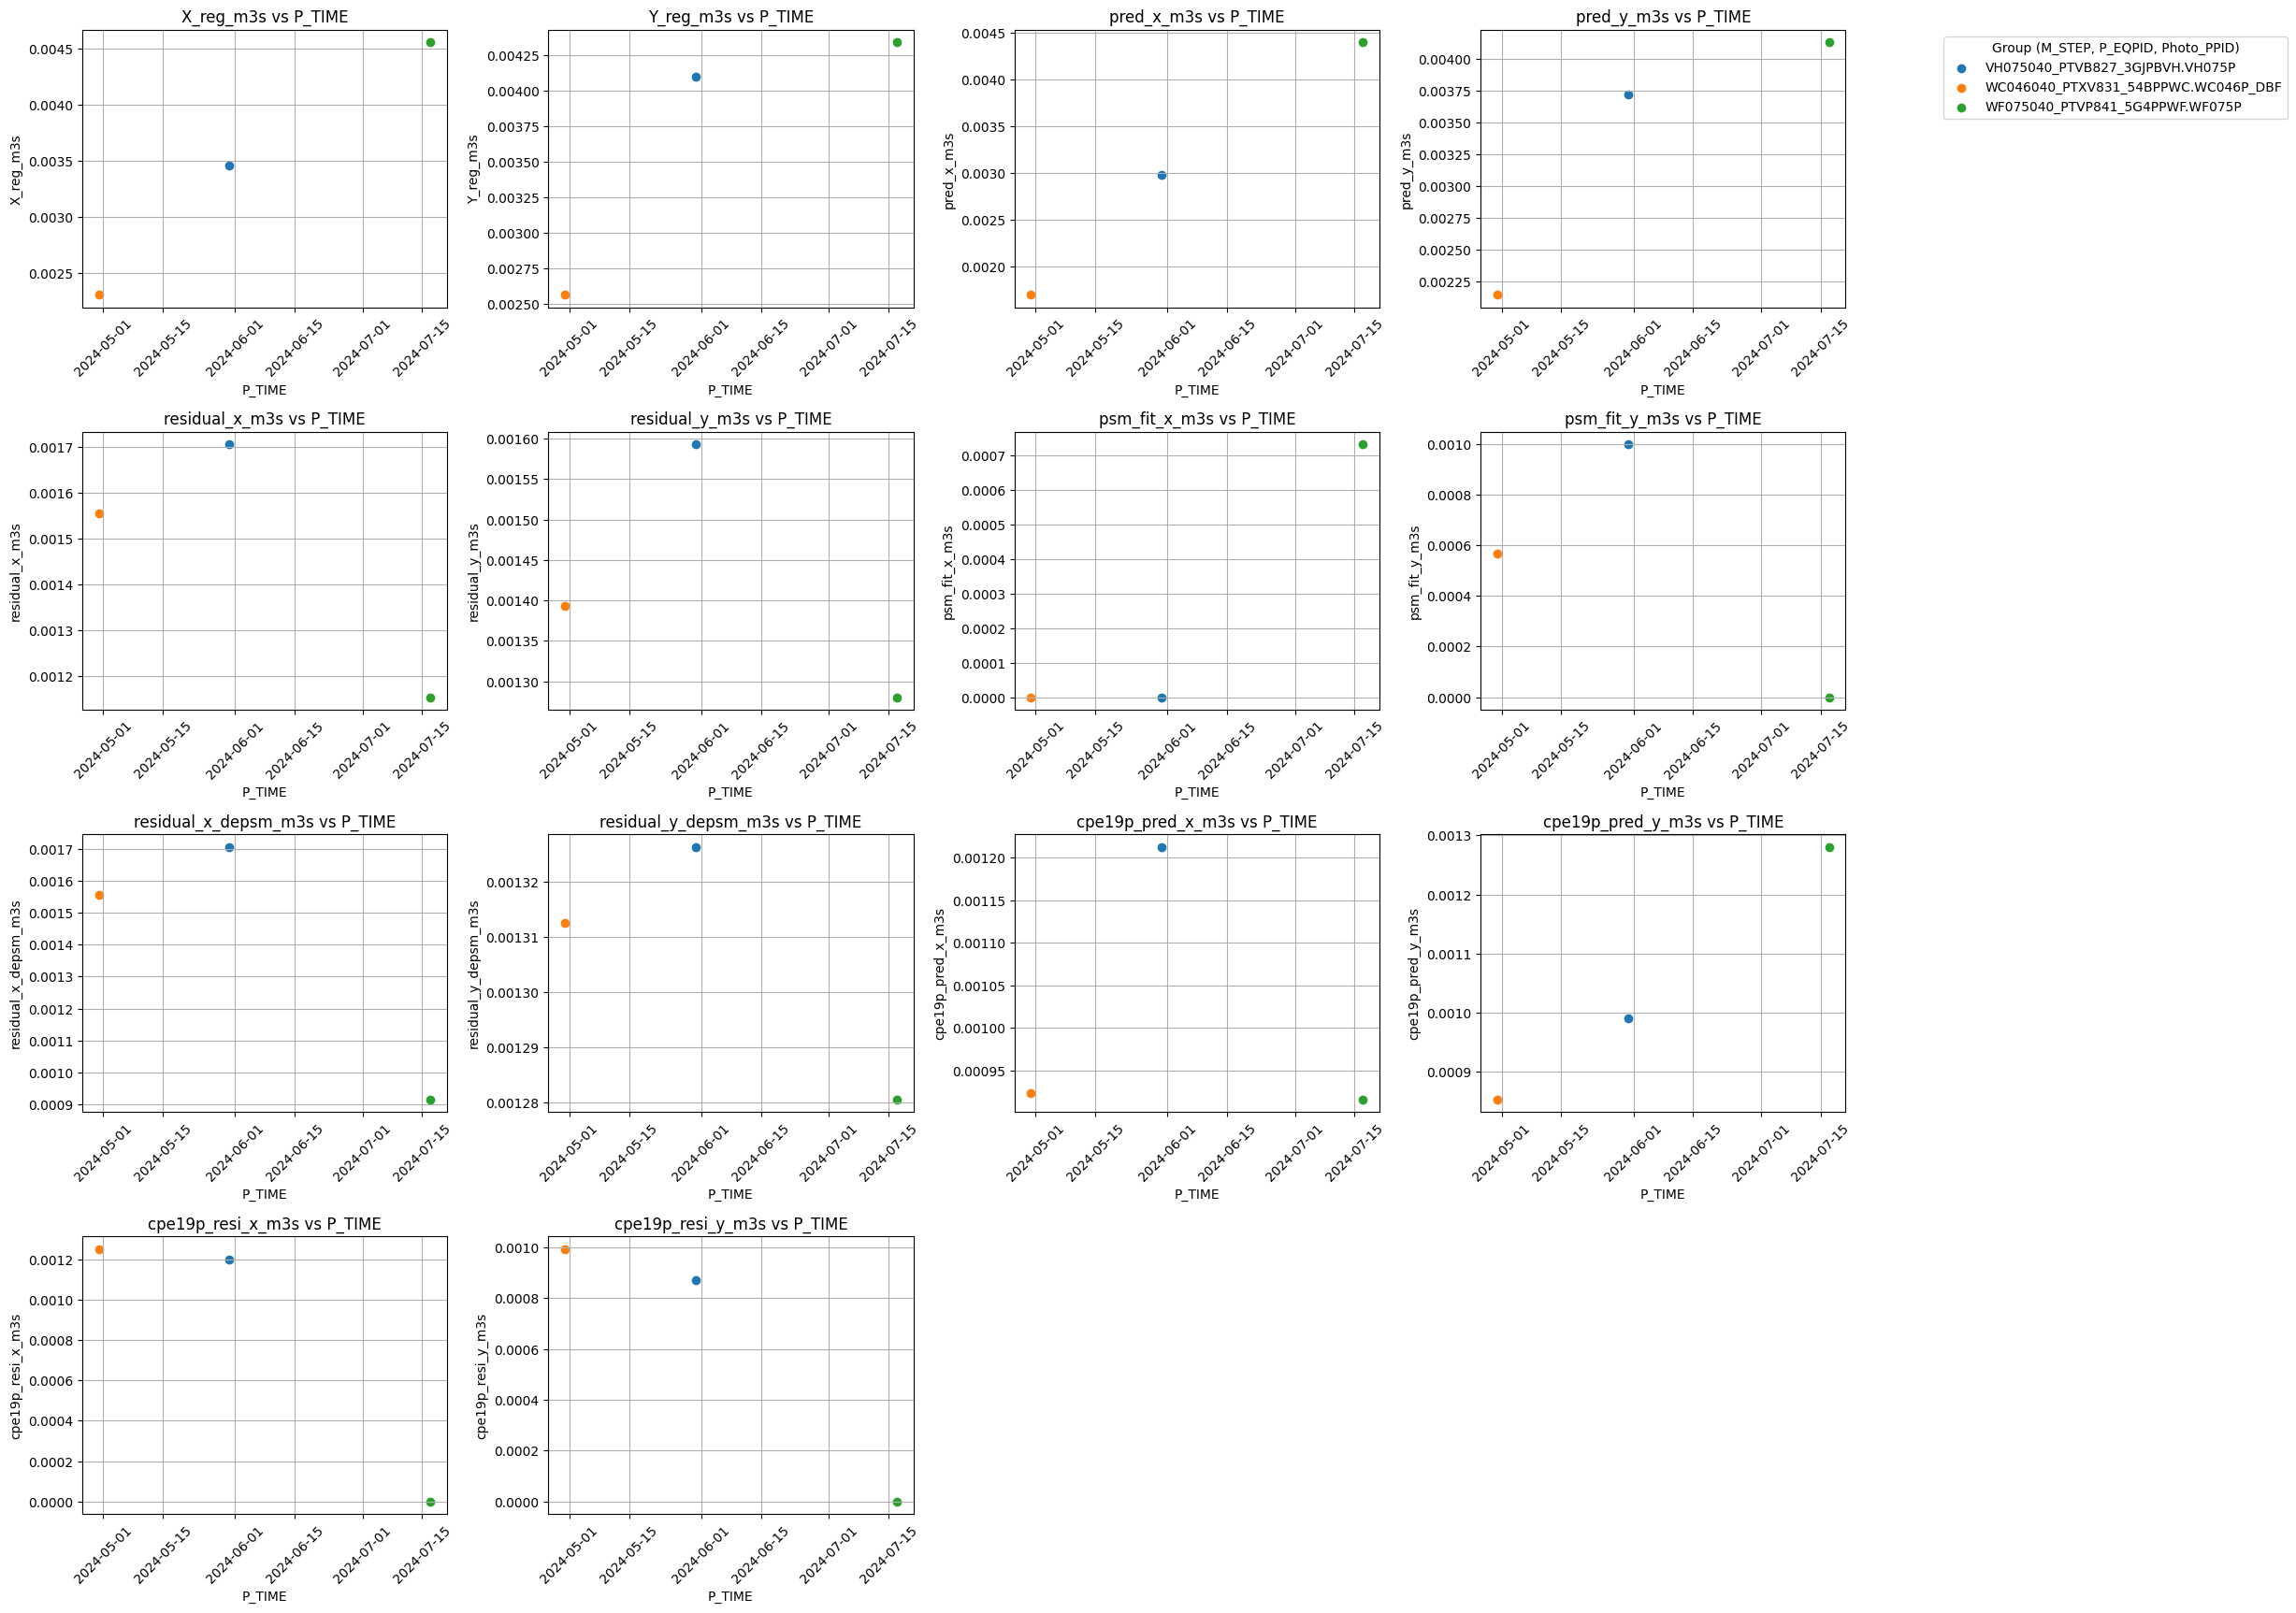

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 데이터 준비
file_path = 'output_m3s.xlsx'
excel_data = pd.read_excel(file_path)

# 'P_TIME'을 시간 형식으로 변환
excel_data['P_TIME'] = pd.to_datetime(excel_data['P_TIME'])

# 세 가지 컬럼을 합쳐서 고유한 그룹 생성
excel_data['group'] = excel_data[['M_STEP', 'P_EQPID', 'Photo_PPID']].agg('_'.join, axis=1)

# 고유 그룹별 색상을 사용할 수 있도록 정의
unique_groups = excel_data['group'].unique()

# 선명한 색상 팔레트에서 고유 그룹에 색상 할당
colors_list = list(mcolors.TABLEAU_COLORS.values())
group_color_map = {group: colors_list[idx % len(colors_list)] for idx, group in enumerate(unique_groups)}

# 새로운 y축 열 목록
new_y_columns = [
    'X_reg_m3s', 'Y_reg_m3s', 'pred_x_m3s', 'pred_y_m3s', 'residual_x_m3s', 'residual_y_m3s', 
    'psm_fit_x_m3s', 'psm_fit_y_m3s', 'residual_x_depsm_m3s', 'residual_y_depsm_m3s',
    'cpe19p_pred_x_m3s', 'cpe19p_pred_y_m3s', 'cpe19p_resi_x_m3s', 'cpe19p_resi_y_m3s' ]



# Scatter plot 그리기 (6행 4열로 배열)
plt.figure(figsize=(20, 25))

for idx, y_column in enumerate(new_y_columns, 1):
    plt.subplot(6, 4, idx)
    
    # 그룹에 따른 색상 구분
    for group in unique_groups:
        group_data = excel_data[excel_data['group'] == group]
        plt.scatter(group_data['P_TIME'], group_data[y_column], label=group, color=group_color_map[group])
    
    plt.title(f'{y_column} vs P_TIME')
    plt.xlabel('P_TIME')
    plt.ylabel(y_column)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

# 범례를 첫 번째 행의 가장 오른쪽에 위치
plt.subplot(6, 4, 4)
plt.legend(title='Group (M_STEP, P_EQPID, Photo_PPID)', bbox_to_anchor=(1.25, 1), loc='upper left')

plt.show()

